In [5]:
import numpy as np
from numpy.linalg import matrix_power
from scipy.stats import norm, gaussian_kde, beta
import scipy.linalg as LA
import matplotlib
import matplotlib.pyplot as plt
from numba import vectorize, jit, njit, float64, prange
import quantecon as qe

## Exercise 1

I had a lot of trouble with this, and ended up having to use Alex Weinberg's code.

In [6]:
class KDE(object):

    def __init__(self, data=np.ndarray, bandwith=None):
        
        self.X = data
        self.n = data.size
        
        if not bandwith:
            self.h = self.compute_silv()
        else:
            self.h = bandwith
            
    def compute_silv(self):
        ''' Silverman's rule chooses optimal bandwith  '''
        sf = 1.06 * (self.n ** (-1/5)) * np.sqrt(np.var(self.X))
        return sf
    
    def f(self, x):
        
        K = norm.pdf
        
        mySum = K( (x - self.X) / self.h)
        val = (1 / (self.h*self.n)) * mySum.sum()
        return val
    
    def estimate_density(self, grid=np.linspace(0, 1, 1000)):
        density = np.empty_like(grid)
        
        for i,n in enumerate(grid):
            density[i] = self.f(n)
        
        return density

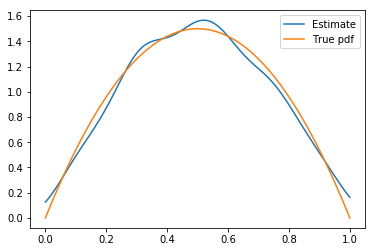

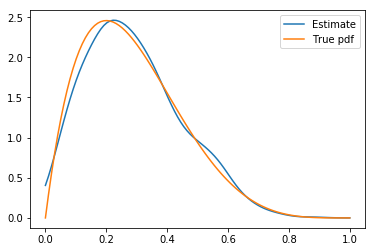

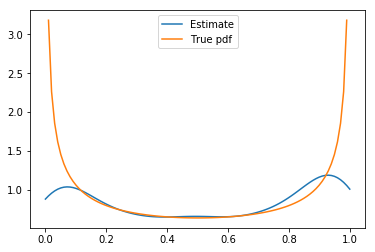

In [7]:

n = 1000
grid  =  np.linspace(0, 1, 100)

beta22 = np.random.beta(2, 2, size=(n,1))
kde1 = KDE(data=beta22)
estimate1 = kde1.estimate_density(grid=grid)

plt.plot(grid, estimate1, label='Estimate')
plt.plot(grid, beta.pdf(grid, 2, 2), label='True pdf')
plt.legend()
plt.show()

beta25 = np.random.beta(2, 5, size=(n,1))
kde2 = KDE(data=beta25)
estimate2 = kde2.estimate_density(grid=grid)

plt.plot(grid, estimate2, label='Estimate')
plt.plot(grid, beta.pdf(grid, 2, 5), label='True pdf')
plt.legend()
plt.show()

beta0505 = np.random.beta(0.5, 0.5, size=(n,1))
kde3 = KDE(data=beta0505)
estimate3 = kde3.estimate_density(grid=grid)

plt.plot(grid, estimate3, label='Estimate')
plt.plot(grid, beta.pdf(grid, 0.5, 0.5), label='True pdf')
plt.legend()
plt.show()

The KDE seems to be a pretty good estimator of the first two PDFs, probably because they in some way resemble a normal distribution. The third PDF is nothing at all like the normal distribution, so it looks very different. The KDE is good only insofar as it is estimating something that is close to normal.

## Exercise 2

C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


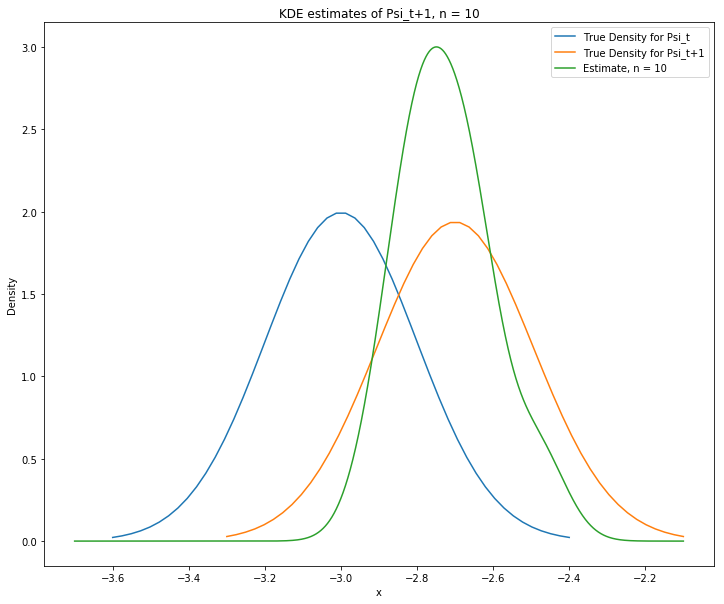

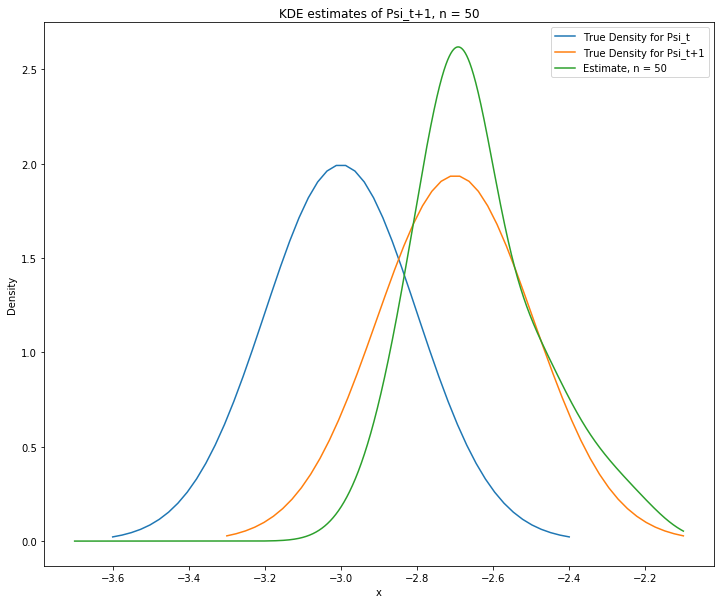

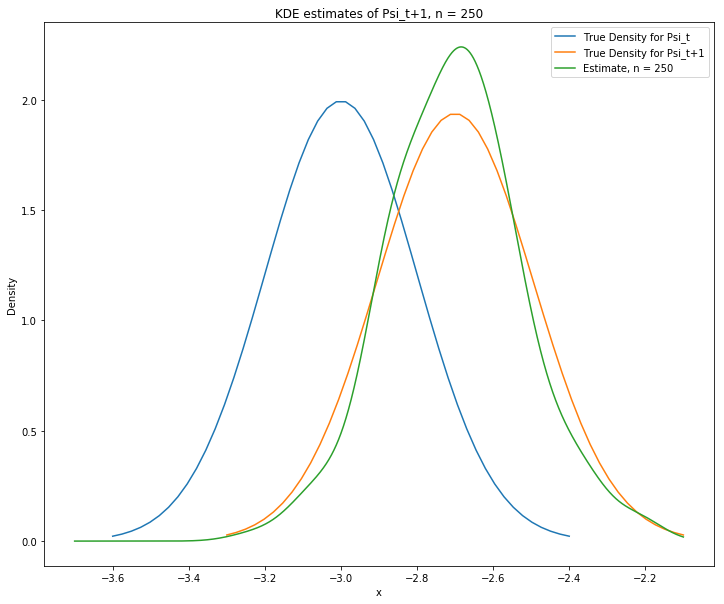

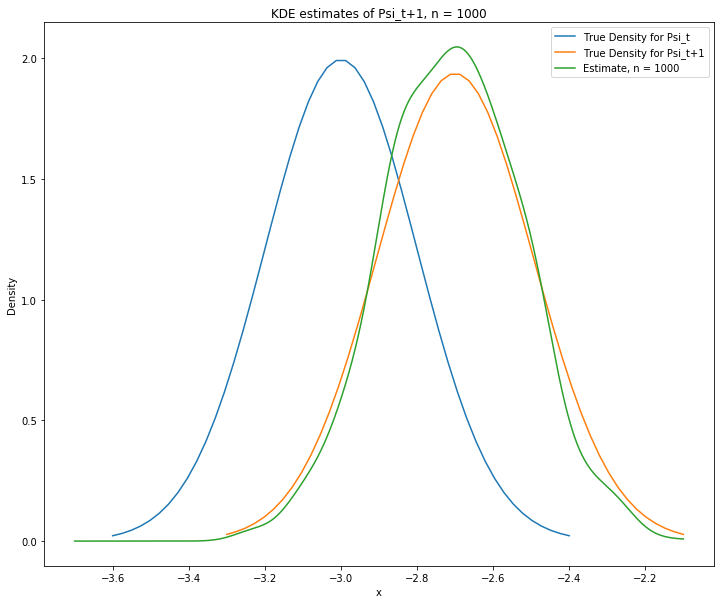

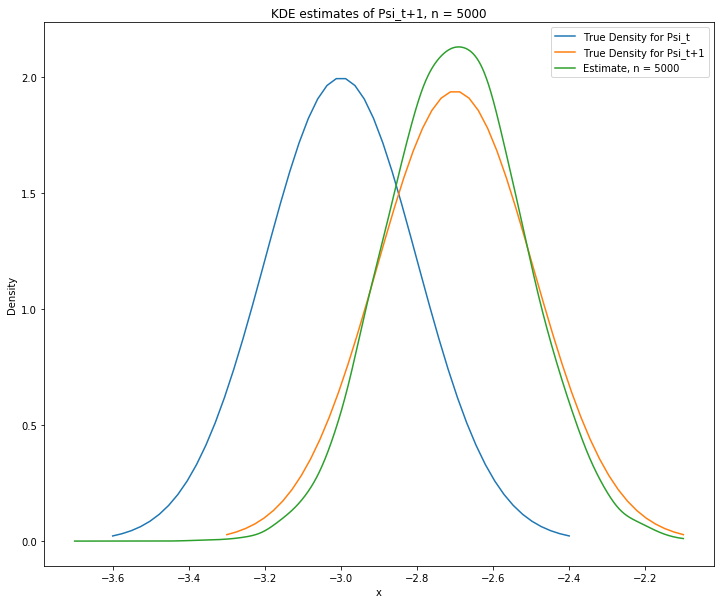

In [84]:
# First Define an update function
def update(X, rho=.9, sigma=.1, b=0):
    #xi is a shock.
    xi = np.random.randn()
    Xnew = rho*X + b + .1*xi*sigma
    return Xnew

#Define function to plot the original functions
def trueplot(mu=-3, s=0.2, rho=.9, sigma=.1, b=0):
    #Initialize domain
    # construct 3sigma domains for x_t and x_t+1
    domainX = np.linspace(mu - 3*(s), mu + 3*(s))
    domainY = np.linspace(rho*mu + b - 3*(s), rho*mu + b + 3*(s))

    # parameters for psi_t+1 distribution
    avg = rho*mu + b
    dev = np.sqrt((rho**2)*(s**2) + (sigma**2))

    plt.plot(domainX, matplotlib.mlab.normpdf(domainX, mu, s), label = "True Density for Psi_t")
    plt.plot(domainY, matplotlib.mlab.normpdf(domainY, avg, dev), label = "True Density for Psi_t+1")


#Define function for making the new X vector
def makeXnew(n, mu=-3, s=.2):
    Xnew = np.zeros(n)
    for i in range(n):
        X = np.random.normal(mu, s)
        Xnew[i] = update(X)
    return Xnew

nlist = [10, 50, 250, 1000, 5000]
grid  =  np.linspace(-3.7, -2.1, 10000)

for n in nlist:
    fig = plt.subplots(figsize = (12, 10))
    kde = KDE(makeXnew(n))
    trueplot()
    plt.plot(grid, kde.estimate_density(grid=grid), label = f"Estimate, n = {n}")
    plt.legend()
    plt.title(f"KDE estimates of Psi_t+1, n = {n}")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.show()
#fig = plt.subplots(figsize=(12, 9))

The KDE does seem to converge to the theoretical distribution!

## Exercise 3
This is not bad.

If I can show that $||A|| < 1$, then I am done. By Gelfand's formula, $||A^k||^{\frac{1}{k}} \to r(A)<1$. And submultiplicativity gives us that for all $k \in \mathbb{N} $ $||A|| = ||(A^k)^{\frac{1}{k}}|| \leq ||A^k||^{\frac{1}{k}}$ which is less than 1 for sufficiently large k.